In [34]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
dataset = pd.read_csv("../vsean_data/post_time_series.csv", header=None, names=["Date","Count"])
dataset.head()

,Date,Count
0,2008-07-31,4
1,2008-08-01,137
2,2008-08-02,93
3,2008-08-03,132
4,2008-08-04,325


In [36]:
print(len(dataset))
dataset.isnull().sum()

3777


Date     0
Count    0
dtype: int64

In [37]:
dataset = dataset.set_index(pd.DatetimeIndex(dataset["Date"]))
dataset = dataset.drop(["Date"], axis=1)
#dataset.to_period("D")
#dataset.index.freq = 'D'
dataset = dataset.asfreq('D')
dataset.index

DatetimeIndex(['2008-07-31', '2008-08-01', '2008-08-02', '2008-08-03',
               '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07',
               '2008-08-08', '2008-08-09',
               ...
               '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26',
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', length=3777, freq='D')

In [38]:
dataset.head()

,Count
2008-07-31,4
2008-08-01,137
2008-08-02,93
2008-08-03,132
2008-08-04,325


In [39]:
stl = decompose(dataset, period=365)

stl

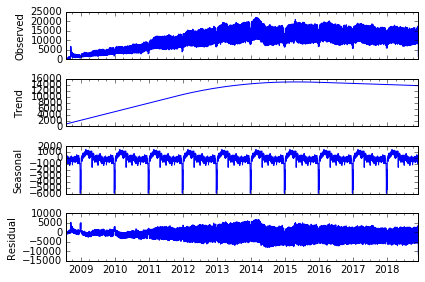

In [40]:
stl.plot();

In [41]:
#Use the same data set, but pretend that we only had the first two third of observations.
#Then we can compare our forecast to the real observation data.
#short_obs = dataset.head(len(dataset)-336)
short_obs = dataset.loc[:"2017-12-31"]
short_obs

,Count
2008-07-31,4
2008-08-01,137
2008-08-02,93
2008-08-03,132
2008-08-04,325
2008-08-05,513
2008-08-06,503
2008-08-07,585
2008-08-08,441
2008-08-09,231


In [42]:
# apply the decomp to the truncated observation
short_stl = decompose(short_obs, period=365)

short_stl

In [43]:
type(short_stl.observed.index.freqstr)

str

The forecast() method requires the following arguments:
- the fit DecomposeResult
- the number of steps forward for which we'd like the forecast
- the specific forecasting function we'll apply to the decomposition

In [44]:
fcast = forecast(stl=short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift)

fcast.head()

,drift
2018-01-01,14440.654443
2018-01-02,14439.800534
2018-01-03,14438.946781
2018-01-04,14438.092950
2018-01-05,14437.239158


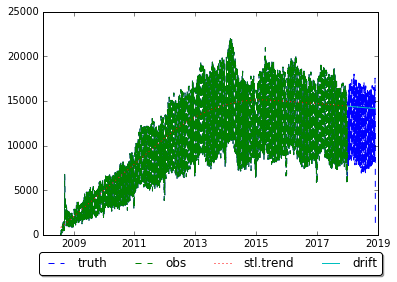

In [45]:
plt.plot(dataset, '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2008','2019');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)

In [46]:
rmse = sqrt(mean_squared_error(dataset.loc["2018-01-01":], fcast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3789.433


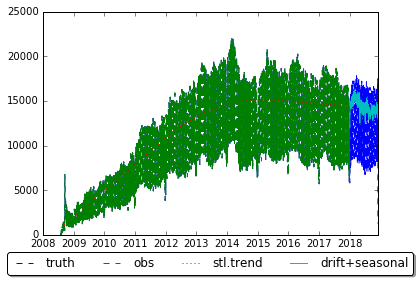

In [47]:
fcast = forecast(short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift, seasonal=True)

plt.plot(dataset, '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2008','2018-12-01');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)

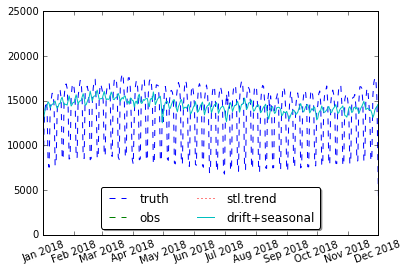

In [48]:
# Plot above graph just to zoom in to year 2018
plt.plot(dataset, '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2018','2018-12-01');
plt.xticks(rotation=20)
plt.legend(loc='lower center', 
          fancybox=True, shadow=True, ncol=2)
# plt.legend(loc="best")

In [49]:
rmse = sqrt(mean_squared_error(dataset.loc["2018-01-01":], fcast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3971.184


In [50]:
# data 2016,2017 predict 2018
short_obs = dataset.loc['2016-01-01':'2017-12-31']
short_obs.head()

,Count
2016-01-01,6786
2016-01-02,8220
2016-01-03,8703
2016-01-04,15013
2016-01-05,16877


In [51]:
len(short_obs)
# apply the decomp to the truncated observation
short_stl = decompose(short_obs, period=365)
short_stl

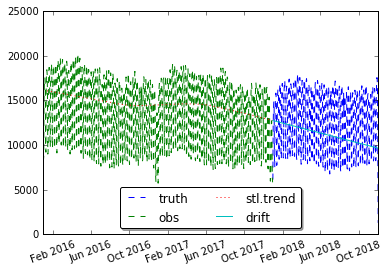

In [52]:
fcast = forecast(stl=short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift)
plt.plot(dataset.loc['2018-01-01':], '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2016','2018-12-01');
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=20)
plt.legend(loc='lower center', 
          fancybox=True, shadow=True, ncol=2)

In [53]:
rmse = sqrt(mean_squared_error(dataset.loc["2018-01-01":], fcast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4344.621


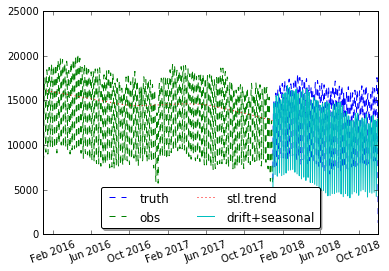

In [24]:
fcast = forecast(short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift, seasonal=True)

plt.plot(dataset.loc['2018-01-01':], '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2016','2018-12-01');
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=20)
plt.legend(loc='lower center', 
          fancybox=True, shadow=True, ncol=2)

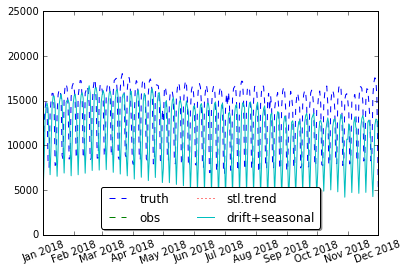

In [25]:
# fcast = forecast(short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift, seasonal=True)
plt.plot(dataset.loc['2018-01-01':], '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2018','2018-12-01');
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=20)
plt.legend(loc='lower center', 
          fancybox=True, shadow=True, ncol=2)

In [26]:
rmse = sqrt(mean_squared_error(dataset.loc["2018-01-01":], fcast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5275.835


Now Use 3 years: 2015-2017 to predict 2018

In [27]:
short_obs = dataset.loc['2015-01-01':'2017-12-31']
short_obs.head()

,Count
2015-01-01,6534
2015-01-02,11267
2015-01-03,8265
2015-01-04,8430
2015-01-05,14212


In [28]:
# apply the decomp to the truncated observation
short_stl = decompose(short_obs, period=365)
short_stl

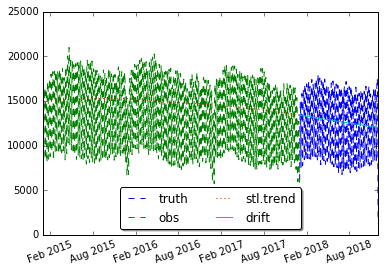

In [29]:
fcast = forecast(stl=short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift)
plt.plot(dataset.loc['2018-01-01':], '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2015','2018-12-01');
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=20)
plt.legend(loc='lower center', 
          fancybox=True, shadow=True, ncol=2)

In [30]:
rmse = sqrt(mean_squared_error(dataset.loc["2018-01-01":], fcast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3752.399


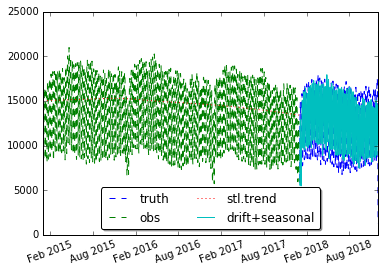

In [31]:
fcast = forecast(short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift, seasonal=True)

plt.plot(dataset.loc['2018-01-01':], '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2015','2018-12-01');
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=20)
plt.legend(loc='lower center', 
          fancybox=True, shadow=True, ncol=2)

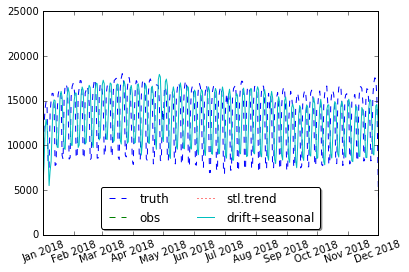

In [32]:
# fcast = forecast(short_stl, steps=len(dataset.loc["2018-01-01":]), fc_func=drift, seasonal=True)
plt.plot(dataset.loc['2018-01-01':], '--', label='truth')
plt.plot(short_obs, '--', label='obs')
plt.plot(short_stl.trend, ':', label='stl.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.xlim('2018','2018-12-01');
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
plt.xticks(rotation=20)
plt.legend(loc='lower center', 
          fancybox=True, shadow=True, ncol=2)

In [33]:
rmse = sqrt(mean_squared_error(dataset.loc["2018-01-01":], fcast))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5108.543
